In [1]:
from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import torch
import torchaudio

/tmp/ipykernel_11697/460966546.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Dataset

In [13]:
spd = pd.read_csv('data/Sleep_FullDataset_withDuplicates.csv')
spd = spd.drop_duplicates(subset='TrackID', keep='first')
spd = spd.drop_duplicates(subset='TrackID', keep='first')

In [14]:
spd.shape

(130308, 28)

In [18]:
import requests

# URL from your dataframe
url = spd.loc[2, 'SampleURL']

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the response
    audio_content = response.content
    
    # Write the content to a file
    with open('output_audio.wav', 'wb') as audio_file:
        audio_file.write(audio_content)
    print("Audio file downloaded successfully.")
else:
    print("Failed to retrieve the audio. Status code:", response.status_code)


Audio file downloaded successfully.


In [19]:
Counter(spd['TrackName'])

Counter({'Sleeping Music': 654,
         'Sleep Music': 595,
         'Deep Sleep': 592,
         'Music For Sleep': 481,
         'Sleep Aid': 345,
         'Relaxing Music': 303,
         'Ambient Music': 286,
         'Dynamite': 260,
         'Music For Sleeping': 259,
         'Binaural Beats': 248,
         'Deep Sleep Aid': 236,
         'Calm Music': 219,
         'Calm Sleeping Music': 213,
         'Calm Music For Sleep': 211,
         'Binaural Beats Sleep Aid': 195,
         'Deep Sleep Music': 188,
         'Home': 174,
         'Ambient Sleep Music': 168,
         'Soothing Music For Sleep': 167,
         'Soothing Music': 156,
         'Calm Sleep Music': 151,
         'Sleep': 146,
         'Alpha Waves': 145,
         'Relaxing Sleeping Music': 138,
         'Lullaby': 136,
         'Binaural Beats and Brainwave Entrainment': 134,
         'Soothing Sleep Music': 129,
         'Soothing Sleeping Music': 127,
         'Sleeping Music For Sleep': 123,
         'Baby Lull

### Torch

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform the data to torch.FloatTensor and normalize it
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# Download and load the test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# Classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Downloaded CIFAR10 dataset.")


100%|██████████| 170498071/170498071 [00:14<00:00, 11960509.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Downloaded CIFAR10 dataset.


In [5]:
import os
import torch
import torchaudio

# Define the path to save the data
data_folder = './data/speechcommands'
os.makedirs(data_folder, exist_ok=True)

# Download and load the training data
trainset = torchaudio.datasets.SPEECHCOMMANDS(root=data_folder, url='speech_commands_v0.02', download=True, subset='training')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Download and load the validation data
valset = torchaudio.datasets.SPEECHCOMMANDS(root=data_folder, url='speech_commands_v0.02', download=True, subset='validation')

valloader = torch.utils.data.DataLoader(valset, batch_size=4, shuffle=False, num_workers=2)

# Download and load the test data
testset = torchaudio.datasets.SPEECHCOMMANDS(root=data_folder, url='speech_commands_v0.02', download=True, subset='testing')

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

print("Downloaded SPEECHCOMMANDS dataset.")


100%|██████████| 2.26G/2.26G [01:22<00:00, 29.5MB/s] 


Downloaded SPEECHCOMMANDS dataset.


### Visualizing (lol?) Dataset

(tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
          0.0000e+00, 0.0000e+00],
         ...,
         [2.0023e-03, 4.8506e-08, 1.6935e-09,  ..., 1.3588e-09,
          2.0616e-06, 1.5228e-04],
         [2.4747e-03, 4.4818e-09, 4.3345e-08,  ..., 6.4700e-11,
          9.6698e-07, 1.5507e-04],
         [2.5268e-03, 2.3036e-10, 9.9184e-08,  ..., 5.3330e-11,
          7.9528e-07, 1.0238e-04]]]), 44100)


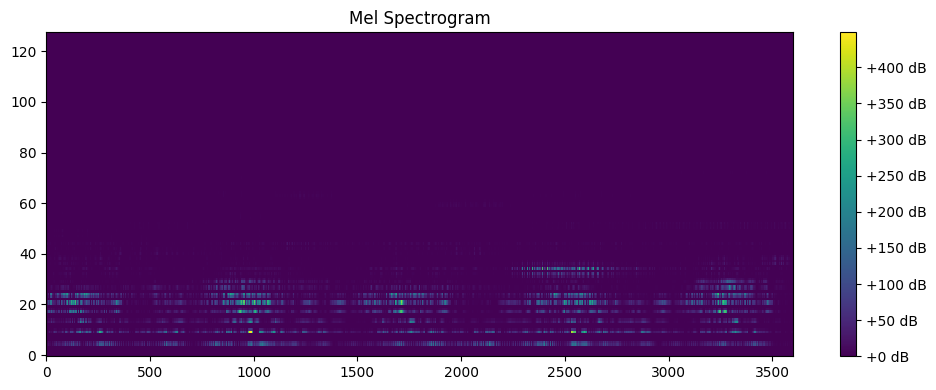

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the tensor
mel_spectrogram = torch.load('cache/data/spotify_sleep_dataset/mel-spectrogram/0_tensor.pt')
print(mel_spectrogram)
# Step 2: Convert the tensor to a NumPy array (if it's not already) and select one channel (e.g., the first channel)
mel_spectrogram = mel_spectrogram[0][0].numpy()  # This selects the first channel

# Step 3: Plot the Spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram, aspect='auto', origin='lower', interpolation='none')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


In [9]:
def convert_tensor_to_wav(tensor_file_path, wav_file_path):
    # Load the tensor and sample rate
    # print(torch.load(tensor_file_path))
    sample_rate = 22048
    waveform = torch.load(tensor_file_path)
    print(sample_rate)

    # Save the waveform as a .wav file
    torchaudio.save(wav_file_path, waveform, sample_rate)

# Example usage
tensor_file_path = 'model_checkpoints/run_20240229_204802/samples/sample_0.pt'  # Update this path
wav_file_path = 'model_checkpoints/run_20240229_204802/samples/sample_0.wav'  # Update this path

convert_tensor_to_wav(tensor_file_path, wav_file_path)


22048


In [6]:
import torch

# Load the file
pt_file, sample_rate = torch.load("cache/data/spotify_sleep_dataset/waveform/87_tensor.pt")

FileNotFoundError: [Errno 2] No such file or directory: 'cache/data/spotify_sleep_dataset/waveform/87_tensor.pt'

In [35]:
pt_file.shape

torch.Size([1, 1323001])

In [17]:
print(len(pt_file))
print(len(pt_file[0]))

2
1


In [24]:
print(pt_file[0][0][0].shape)

torch.Size([3601])


In [31]:
pt_file[0][0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

### Creating reference and test sets


In [2]:
import torch
import numpy as np
import os

# Function to generate a sine wave
def generate_sine_wave(freq, sample_rate, duration):
    t = torch.linspace(0, duration, int(sample_rate * duration))
    waveform = torch.sin(2 * np.pi * freq * t)
    return waveform

# Directories for saving the waveforms
reference_dir = 'data/test_reference'
generated_dir = 'data/test_generated'

# Create directories if they don't exist
os.makedirs(reference_dir, exist_ok=True)
os.makedirs(generated_dir, exist_ok=True)

# Parameters for the sine wave
sample_rate = 16000  # Sample rate in Hz
duration = 1  # Duration in seconds

# Generate and save 10 sine wave samples
for i in range(10):
    freq = 440 + i * 10  # Slightly different frequency for each sample
    
    # Generate sine wave
    waveform = generate_sine_wave(freq, sample_rate, duration)
    
    # Save to reference directory
    torch.save(waveform, os.path.join(reference_dir, f'sample_{i}.pt'))
    
    # Generate another sine wave (could modify parameters if needed)
    waveform_generated = generate_sine_wave(freq, sample_rate, duration)
    
    # Save to generated directory
    torch.save(waveform_generated, os.path.join(generated_dir, f'sample_{i}.pt'))

print("Waveform generation and saving completed.")


Waveform generation and saving completed.
